## Used libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8] # setting bigger, fixed size for plots
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

## Short description of chosen dataset

I will be working on **Heart Disease** dataset. It's a small dataset consisting of 303 rows describing 303 patients. Key column is the 'num' and it tells us if patient has a heart disease. This dataset is a combination of general data ('age','sex','cp'), blood and blood flow analysis ('trestbps','chol','fbs') and ECG analysis (remaining). All data are numeric but some numeric values represent non numeric information.

## Reading dataset 

In [2]:
table = pd.read_csv("heart_disease_dataset.csv")
table.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


## Basic info about values in dataset

In [3]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
num         303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
profile = ProfileReport(table, title='Pandas Profiling Report', html={'style':{'full_width':True}})

## Pandas profiling (does not work in github view)
Web application displayed below is ganerated thanks to *pandas_profiling* library. We will use it to have a peek at our data. Despite obvious benefits of quick analysis this is not detailed and elastic enought to be our only tool while doing analysis. Another downside is that we generate full report even if we only want parto of it, so digging through it can be quite irretating and time consuming.  


In [5]:
profile

### From this we can learn a few things
* We have no missing data in our dataset (which is great)
* All columns have numeric data*
* There are some serious outliners (e.g. 'ca' and 'thal' have only a few unique numeric values but both have '-100000' outliners) 
### Those ascpects should be taken into account during data processing


\*But if we read [description](https://www.mldata.io/dataset-details/heart_disease/) of this dataset we will quickly notice that some columns represent **enumerate data** which means that in a few colums values have hidden meaning and should be taken only as an **index** e.g. in 'sex' 1 = 'male' , 0 = 'female', in 'thal' 6 = 'fixed defect', 3 = 'normal' and not as any type of quantity.

# Basic analysis

## Overall correlations 

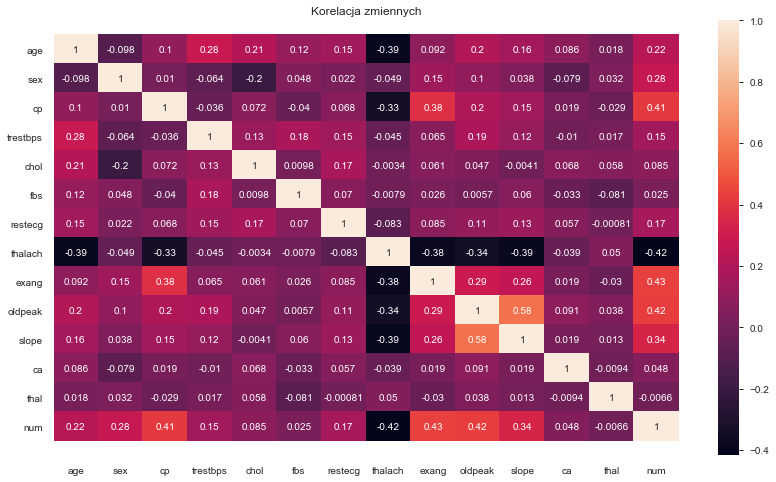

In [9]:
corr = table.iloc[:,].corr()
ax=sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True)
# below is a workaround for matrix truncation
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Korelacja zmiennych')
plt.show()

In order to not prolong this analysis for I will ignore cases that have absolute correlation value of less than 0.2 since they are not correalated and not much can be said about them.

# Chosen interesting observation

## Could abnormal ST fragment characteristics be related to heart diseases?

Thanks to the data from ecg we can look closely at various characteristics of a heart in peak performance in comparison to rest. This anables us to measure two very important aspects of human heart's work. **Slope** and **oldpeak**. I will describe them very briefly, so to fully understand what they mean I encurage chacking the links [slope](https://en.wikipedia.org/wiki/ST_segment), [oldpeak](https://books.google.pl/books?id=FisscJZR4VIC&pg=PT66&lpg=PT66&dq=ecg+oldpeak&source=bl&ots=Nzrrib-MHs&sig=ACfU3U1yn2gNpgedka8-oHURjCNaOKFedg&hl=pl&sa=X&ved=2ahUKEwjrmbbB5_HnAhWL-ioKHZEcDqsQ6AEwE3oECAoQAQ#v=onepage&q=ecg%20oldpeak&f=false). **Slope** itself gives us a lot of information about possibilty of different heart diseases and as we can see below different angles of ST segment (that **slope** represents) seems to be connected with ST segment elevation relative to baseline know in other words as **oldpeak**

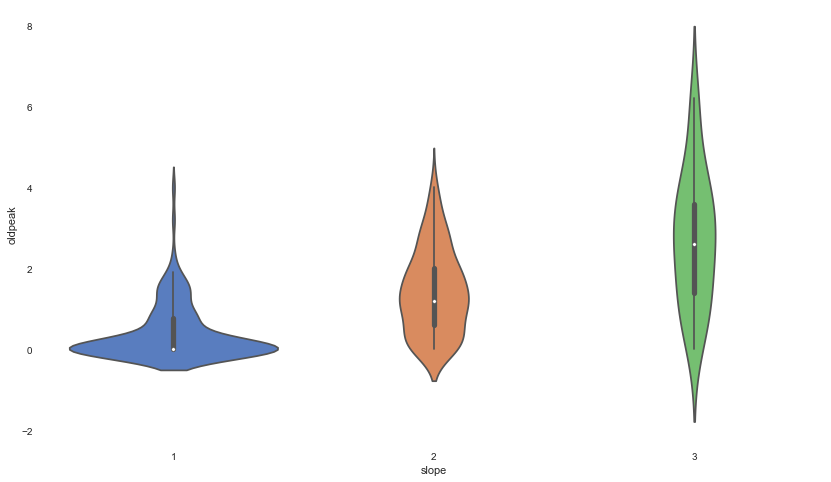

In [10]:
sns.violinplot(x='slope', y='oldpeak', data=table, palette="muted")

### Connection to heart diseases


Both of those characteristics seem to be connected with heart diseases. Which can be seen below, but the question still holds. How are they connected?


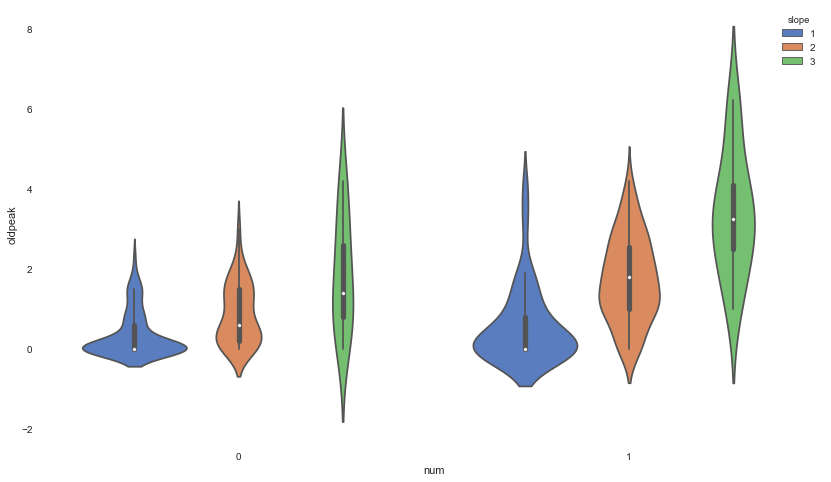

In [11]:
sns.violinplot(x='num', y='oldpeak', hue='slope',data=table, palette="muted")

### Procentage of people with hearth disease in diffrent slope groups

People with *downsloping* or *flat* ST fragment have higher risk of developing **heart disease**. Propability is even grater when **oldpeak** is above normal. 

In [12]:
table.loc[:,['slope','num']].groupby('slope').mean()

,num
slope,
1,0.253521
2,0.650000
3,0.571429


### Mean oldpeak in different slope groups of people with and without heart diseases

In [13]:
table.loc[:,['slope','oldpeak','num']].groupby(['num','slope']).mean()

oldpeak
num slope          
0   1      0.352830
    2      0.863265
    3      1.833333
1   1      0.572222
    2      1.732967
    3      3.375000

This is particulary intresting because we can quicky state that a person with a much higher oldpeak than mean in his slope group should most definitely visit doctor as soon as possible. Or if they don't want to have any contact with them, they can just try eating apples.  

# Close look at distributions of continuous data

## Age distribution

Text(0.5, 1.0, 'Age distribution')

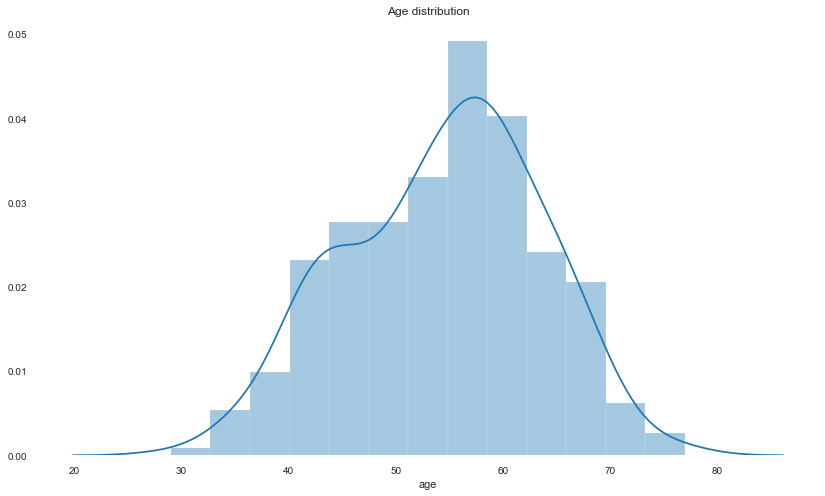

In [14]:
age = sns.distplot(table['age'])
age.set_title('Age distribution')

## Resting blood pressure (mm Hg)

Text(0.5, 1.0, 'Resting blood pressure (mm Hg)')

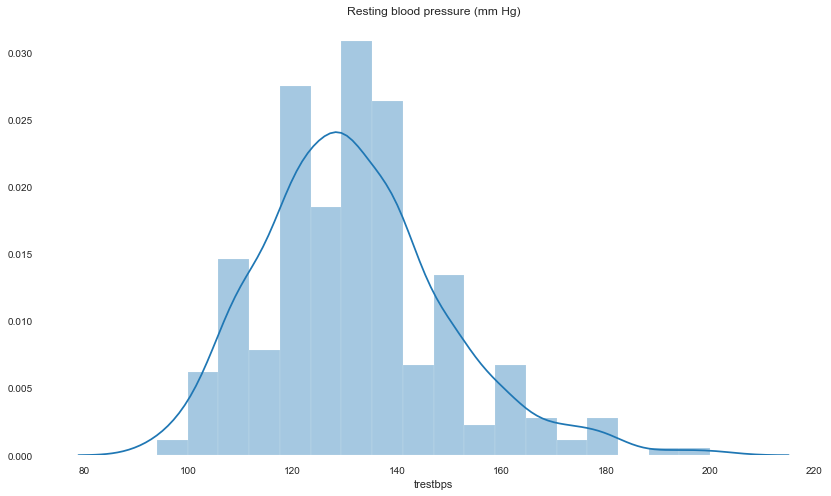

In [15]:
pre=sns.distplot(table['trestbps'])
pre.set_title('Resting blood pressure (mm Hg)')

# Possibly valiuable observations

### Serum cholestrol distribution for both sexes

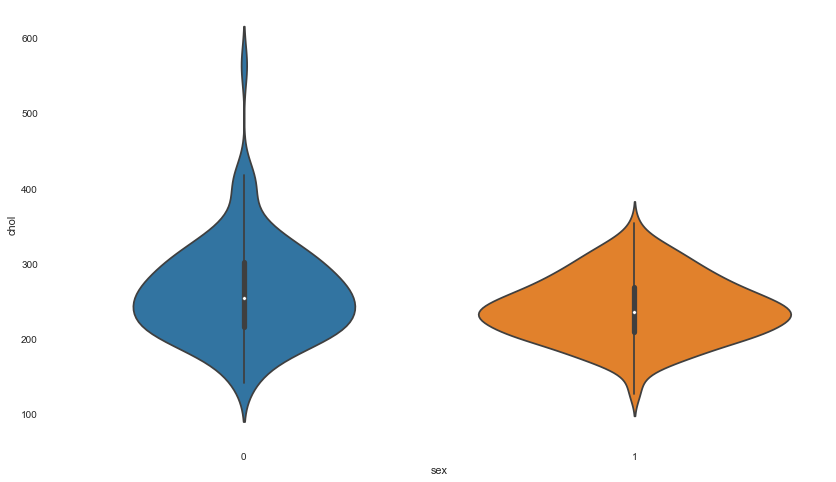

In [16]:
sns.violinplot(x='sex', y='chol', data=table)

### Huge differences in means and esspecialy in hearth disease occurrence
1=male  0=female

In [24]:
table.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
sex,,,,,,,,,,,,,
0,55.721649,3.144330,133.340206,261.752577,0.123711,0.958763,151.226804,0.226804,0.867010,1.567010,0.546392,-1027.309278,0.257732
1,53.834951,3.165049,130.912621,239.601942,0.160194,1.004854,148.844660,0.373786,1.120874,1.616505,-1941.029126,-480.223301,0.553398


### Oldpeak

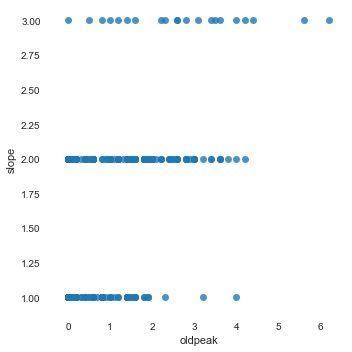

In [17]:
sns.lmplot(x='oldpeak',y='slope',data=table, fit_reg=False)

### Maximum heart rate achieved by hearth disease status for men and women

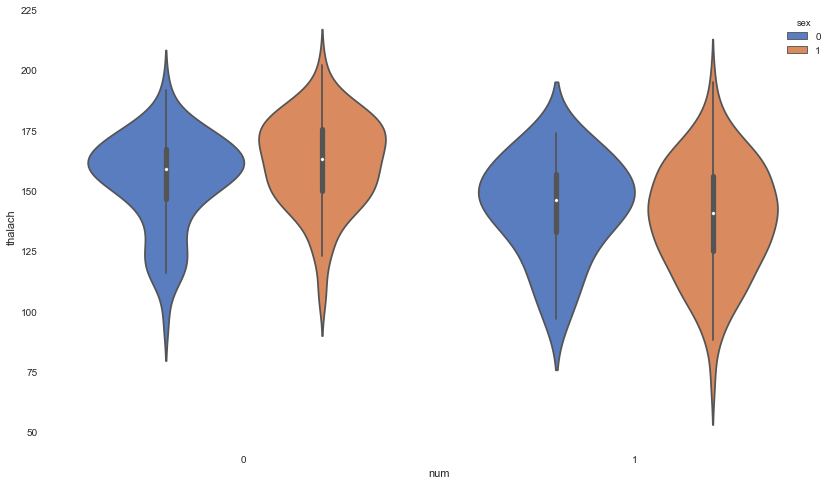

In [18]:
sns.violinplot(x='num', y='thalach', hue='sex', data=table, palette="muted")

As we could expect there are slight diffrences between functioning of healty heart and the one suffering from a disease, this could be later used.